
# Unconstrained Optimization Using Gradient Descent

In this small project, I will examine the minimization of functions using gradient descent. Of particular interest is the convergence rate of the algorithm. I examine this for convex and strongly coinvex functions. I also confirm that the convergence rate depends on the characteristics of the problem.

Credits: Adapted from notes by Francis Bach, Alexandre d'Aspremont, Pierre Gaillard, Aude Genevay, and ELE 545 at Princeton Univeristy

# Background 

## Gradient Descent

Let $f\colon \mathbb{R}^n \rightarrow \mathbb{R}$ be differentiable with gradient $\nabla f(x)$. Gradient descent attempts to find a local minimum of $f$ using the iterative algorithm:
$$
x_{t+1} = x_t -\gamma \nabla f(x_t),\quad x_0\in \mathbb{R^n}.
$$

In order to ensure convergence to a local minimum the fixed step size $\gamma$ can't be too big. The standard fixed step size is $\gamma = 1/L$  where $L$ is a uniform upper bound on the largest eigenvlaue of $\nabla^2f(x)$.
    
## Linear Convergence

When the rate of convergence of an optimization algorithm satisfies 

$$
|f(x_t)-f(x^\star)| \leq C \alpha ^t
$$

for some constant $0< \alpha <1$, the error $|f(x_t)-f(x^\star)|$ converges to $0$ exponentially in $t$. By taking logs of both sides you see that 

$$
\log (|f(x_t)-f(x^\star)|)\leq t \log(\alpha) + \log (C).
$$

This is also termed "linear convergence".

## Ridge Regression

I will examine the following quadratic minimization problem: 

$$\min_{x \in \mathbb{R}^n}\  f(x) = \frac{1}{2m}\|y - F x\|^2_2+\frac{\lambda}{2} \|x\|_2^2$$

Here $F \in \mathbb{R}^{m \times n}$ is a given matrix and $y \in \mathbb{R}^m$ is a given vector. The constant $\lambda$ is a hyperparameter that weights the relative importance of the second term versus the first term in $f(x)$. This particular problem is known as **ridge regression**.

We have selected this problem as a testbed since it has a known solution. The optimal $x^\star$ for the ridge regression problem is

$$
x^\star = (F^T F + m\lambda I)^{-1}F^T y.
$$

What we want to explore is the convergence rate of gradient descent to the known solution.

## Final Notes

$f(x)$ is strongly convex, meaning we can find a maximum value of $c$ for which it is $c$-strongly convex.

$\nabla f(x) = \left (\frac{1}{m} F^TF + \lambda I_n \right ) x - \frac{1}{m} F^T y$

$\nabla^2f(x) = \frac{1}{m}F^T F + \lambda I_n$ 

$c \leq \lambda + \frac{1}{m} \lambda_{\min}(F^TF).$

# Implementation of Gradient Decent

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

%matplotlib inline 

## Strongly convex versus strictly convex function

Minimizing $f_1(x)=x^2$ and $f_2(x)=x^4$

In [2]:
# define the objective function = x^2

def objfuncX2(x):
    return x**2, 2*x

# define the objective function = x^4

def objfuncX4(x):
    return x**4, (4*(x**3))

def gradDecent(obj):
    
    #defining constants
    it = 0
    maxIt = 200
    step = 0.1
    eps =1e-3 #step size
    
    #getting "random" number as imput
    old_x = 0.5; 
    x_list = [old_x]
    
    #starting loop
    while (it<maxIt):
        it +=1
        fx,gradx = obj(old_x)
        
        if (abs(gradx) <= eps ):
            break
        
        new_x = old_x - gradx*step
        old_x = new_x
        x_list.append(old_x)
        
    print("Number of iterations :", it)
    print("Min after X iterations is:", new_x,"\n")
    return x_list

Number of iterations : 32
Min after X iterations is: 0.0004951760157141523 

Number of iterations : 200
Min after X iterations is: 0.0775469722576131 



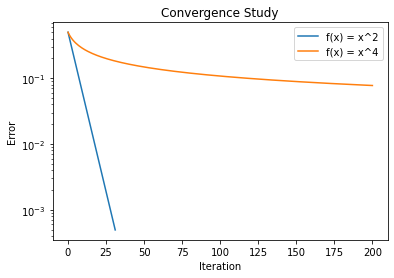

In [3]:
# doing gradient decent on x^2
x2_list = gradDecent(objfuncX2)

#doing gradient decent on x^4
x4_list = gradDecent(objfuncX4)

plt.semilogy(x2_list,label="f(x) = x^2")
plt.semilogy(x4_list,label="f(x) = x^4")
plt.legend()
plt.title('Convergence Study')
plt.ylabel('Error')
plt.xlabel('Iteration')
plt.show()

Note that the convergence for x^2 is linear in a log plot and way faster than the convergence of x^4 wich is non linear in the same plot. The plots are different becaues x^2 is a strogly convex function while x^4 is a strictly convex function. Furthermore, as we get closer and closer to the minimum, the gradient of x^4 becomes significantly smaller than the gradient of x^2, meaning that gradient decent becomes less and less efficient as we get closer to zero."

## Gradient Decent for Ridge Regession

### Generating random data
Generating random matrix $F \in \mathbb{R}^{m \times n}$ of size $m=50$ and $n=60$ where each row of $F$ belongs to $[0,1]^n$. This implies that that $F$ will have linearly dependent columns.

Then we generate $y$ as $Fx + w$ where $x\in \mathbb{R}^n$ and $w$ is a normally distributed noise vector in $\mathbb{R}^m$. Where $x \in [0,1]^n$. Then generate a target vector $y \in \mathbb{R}^m$. 

In [4]:
n = 60 # dimension of x
m = 50  # number of data points
F = np.random.rand(m,n)

w = np.random.randn(m)
x = np.random.rand(n)
y = F @ x + w

### Calculating maximum step sizes and eigenvalues

First we numerically compute the largest eigenvalue and smallest eigenvalue of $\nabla^2 f(x) = P = \frac{1}{m}F^T F + \lambda I$. These will be used to set the constant step size in gradient descent and to bound the rate of convergence.

In addition, we compute the condition number of the matrix:
$$\frac{\lambda_{\max}(P)}{\lambda_{\min}(P)}.$$
Note that a very large condition number is a warning of a lack of numerical robustness.



In [5]:
# regularization parameter (lambda)
reg = 0.1        

#defining matrix
P = (1/m)*(F.T @ F) + reg*np.identity(n)

#calculating e-values
evalues = np.linalg.eigvals(P)

maxEValue = np.real(evalues.max())
minEValue = np.real(evalues.min())
conditionNumber = maxEValue/minEValue
print("Maximum eigevalue: ", maxEValue)
print("Minimum eigevalue: ", minEValue)
print("Condition Number: ", conditionNumber)

Maximum eigevalue:  15.613363445022483
Minimum eigevalue:  0.09999999999999971
Condition Number:  156.13363445022526


### Calculating optimal ridge solution analytically

We now compute $x^\star$ (optimal x) and $f(x^\star)$ numerically. 

In [6]:
# solving for xStar
xStar=np.linalg.solve( (F.T@F + m*reg*np.identity(n)), (F.T @ y) )

# solving for f(xStar)
fxStar=0.5*m*(np.linalg.norm(y-F@xStar)**2) + 0.5*reg*(np.linalg.norm(xStar)**2) 

print("xStar:",xStar)
print("f(xStar):", fxStar)

xStar: [0.44524176 0.82939198 0.52225616 0.58315286 0.75164987 0.50205716
 0.69947411 0.19361422 0.63507336 0.45651599 0.5661852  0.41149283
 0.76342152 0.65149329 0.38392612 0.70069792 0.92976328 0.73568416
 0.57919489 0.37620563 0.44742479 0.63262947 0.3475243  0.68994654
 0.71196413 0.64174663 0.77225582 0.67539668 0.60498423 0.88586566
 0.69175516 0.73581666 0.51440441 0.11392104 0.56162702 0.4052926
 0.84092934 0.41870652 0.45746089 0.31501505 0.70545213 0.65846307
 0.48619648 0.34839997 0.45176678 0.34340119 0.9398865  0.40531367
 0.33183727 0.43806039 0.6686051  0.66655204 0.57096554 0.52104845
 0.46371878 0.6449911  0.53506367 0.38420493 0.45392658 0.54822033]
f(xStar): 452.3287553026282


### Numerically solving ridge regression using gradient descent 

Now that we know the solution $x^\star$ and the largest and smallest eigenvalues of $P$, we can explore the convergence of gradient descent with both constant stepsize and variable step size.

In [7]:
# code configuration

reg = 1 #regularization parameter
n = 60 # dimension of x
m = 50  # number of data points
F = np.random.rand(m,n)
w = np.random.randn(m)
x = np.random.rand(n)
y = F @ x + w

In [8]:
# Gradient Descent with contsant step size

def gradDecentConstantStep(xInitial,Lambda):
    
    reg = Lambda
    x = xInitial
    xStar=np.linalg.solve( (F.T@F + m*reg*np.identity(n)), (F.T @ y) )
    
    it = 0
    maxIt = 200
    eps =1e-3
    
    #calculating second derivative and defining step
    Second = (1/m)*(F.T @ F) + reg*np.identity(n) 
    step = 1/np.real(np.linalg.eigvals(Second).max())
    
    #getting random number as imput
    norm_list = []
    
    #starting loop
    while (it<maxIt):
        
        #calculating first derivative
        First = (Second @ x) - (1/m)*(F.T @ y)
        
        if (np.linalg.norm(First,2) <= eps):
            break
            
        new_x = x - First*step
        
        norm = np.linalg.norm((new_x-xStar),2)
        
        x = new_x
        it +=1
        norm_list.append(norm)
        
    print("Number of iterations :", it)
    print("norm(x-xStar) after N iterations:", norm,"\n")
    return norm_list, step

normList1, stepCons1 = gradDecentConstantStep(x,reg)

Number of iterations : 117
norm(x-xStar) after N iterations: 0.0009599031003704482 



Number of iterations (optimal) : 25
norm(x-xStar) after N iterations (optimal): 0.0007235019593573705 



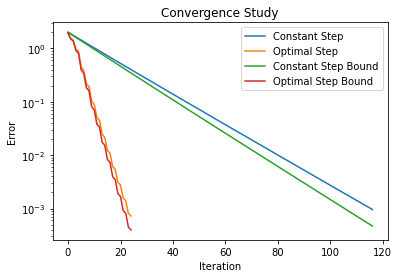

In [9]:
# Gradient Descent with optimal step size

def gradDecentOptimalStep(xInitial, Lambda):
    
    x = xInitial
    reg = Lambda
    xStar=np.linalg.solve( (F.T@F + m*reg*np.identity(n)), (F.T @ y) )
    
    it = 0
    maxIt = 200
    eps =1e-3
    
    #calculating second derivative and defining step
    Second = (1/m)*(F.T @ F) + reg*np.identity(n) 
    First = (Second @ x) - (1/m)*(F.T @ y)
    step = (First@First.T)/(First.T @ P @ First)
    
    #getting random number as imput
    norm_list = []
    step_list =[]
    
    #starting loop
    while (it<maxIt):
        
        #calculating first derivative
        First = (Second @ x) - (1/m)*(F.T @ y)
        
        step = (First@First.T)/(First.T @ P @ First)
        
        if (np.linalg.norm(First,2) <= eps):
            break
            
        new_x = x - First*step
        
        norm = np.linalg.norm((new_x-xStar),2)
        
        x = new_x
        it +=1
        norm_list.append(norm)
        step_list.append(step)

        
    print("Number of iterations (optimal) :", it)
    print("norm(x-xStar) after N iterations (optimal):", norm,"\n")
    return norm_list, step_list

normList2, step_list_optimal = gradDecentOptimalStep(x,reg)

##calculating the bounds
constantStepBound1 = []
for i in range(0,len(normList1)):
    constantStepBound1.append(np.exp(-i*minEValue*stepCons1)*normList1[i])
        
cumSumOptimal1 = np.cumsum(step_list_optimal)
optimalStepBound1 =[]
for i in range(0,len(cumSumOptimal1)):
    optimalStepBound1.append(np.exp(-minEValue*cumSumOptimal1[i])*normList2[i])

plt.semilogy(normList1,label="Constant Step")
plt.semilogy(normList2,label="Optimal Step")
plt.semilogy(constantStepBound1,label="Constant Step Bound")
plt.semilogy(optimalStepBound1,label="Optimal Step Bound")

plt.legend()
plt.title('Convergence Study')
plt.ylabel('Error')
plt.xlabel('Iteration')
plt.show()


### Changing regularization parameter $\lambda$
   

Number of iterations : 117
norm(x-xStar) after N iterations: 0.0009599031003704482 

Number of iterations (optimal) : 25
norm(x-xStar) after N iterations (optimal): 0.0007235019593573705 



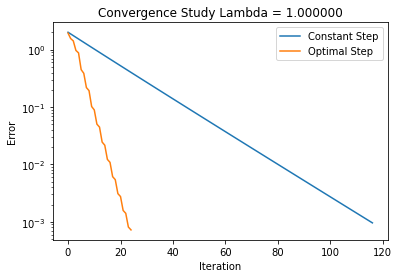

Number of iterations : 84
norm(x-xStar) after N iterations: 0.000651451894241822 

Number of iterations (optimal) : 27
norm(x-xStar) after N iterations (optimal): 0.0003574094237689107 



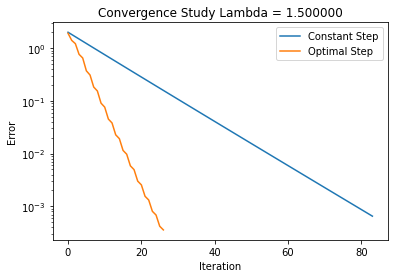

Number of iterations : 56
norm(x-xStar) after N iterations: 0.00037516065150688683 

Number of iterations (optimal) : 27
norm(x-xStar) after N iterations (optimal): 0.00015577210297323398 



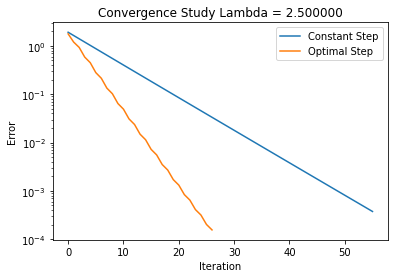

Number of iterations : 39
norm(x-xStar) after N iterations: 0.00022072912113264053 

Number of iterations (optimal) : 23
norm(x-xStar) after N iterations (optimal): 8.384874385329843e-05 



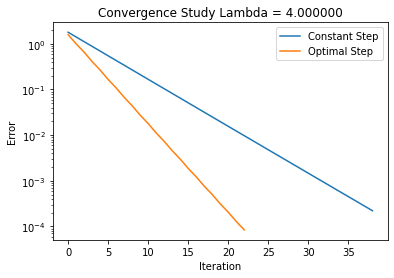

In [10]:
#choosing different lambdas
lambdas = np.array([1.0, 1.5, 2.5, 4.0])

for reg in lambdas:
    #doing gradient decent
    normListConst, stepCons = gradDecentConstantStep(x,reg)
    normListOptimal, stepList = gradDecentOptimalStep(x,reg)
    
    #plotting
    plt.semilogy(normListConst,label="Constant Step")
    plt.semilogy(normListOptimal,label="Optimal Step")

    plt.legend()
    plt.title('Convergence Study Lambda = %f' %reg)
    plt.ylabel('Error')
    plt.xlabel('Iteration')
    plt.show()
    

Note that as we increase lambda so we also decrease our convergence times (we decrease the number of iterations). This is due to the fact that large lambdas make the quadratic term in our equation more dominant, which then also makes our function more strongly convex. This makes our gradient decent technique more efficient, even if we end up having smaller steps as a result of larger eigenvalues when we increase lambda.

### Checking Small Values of lambda



Note that the regularization parameter $\lambda$ changes the quadratic term in the function. As $\lambda$ gets larger, the function gets more strongly convex; as $\lambda$ gets small it is less strongly convex. If $F$ has linearly dependent columns, $\lambda_{\min}(P)$ will converege to $0$ as $\lambda \rightarrow 0$.

Number of iterations : 200
norm(x-xStar) after N iterations: 0.40095508595579354 

Number of iterations (optimal) : 53
norm(x-xStar) after N iterations (optimal): 0.009443770463200309 



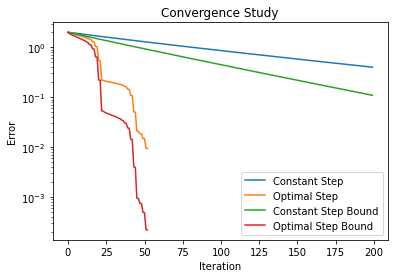

In [13]:
#doing gradient decent
normListConst, stepCons = gradDecentConstantStep(x,0.1)
normListOptimal, stepList = gradDecentOptimalStep(x,0.1)

##calculating boundns
constantStepBound = []
for i in range(0,len(normListConst)):
    constantStepBound.append(np.exp(-i*minEValue*stepCons)*normListConst[i])
        
cumSumOptimal = np.cumsum(stepList)
optimalStepBound =[]
for i in range(0,len(cumSumOptimal)):
    optimalStepBound.append(np.exp(-minEValue*cumSumOptimal[i])*normListOptimal[i])

##plotting
plt.semilogy(normListConst,label="Constant Step")
plt.semilogy(normListOptimal,label="Optimal Step")
plt.semilogy(constantStepBound,label="Constant Step Bound")
plt.semilogy(optimalStepBound,label="Optimal Step Bound")

plt.legend()
plt.title('Convergence Study')
plt.ylabel('Error')
plt.xlabel('Iteration')
plt.show()
